# Medical Data analysis

In [1261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.mixture import GaussianMixture


from utils import average_accuracy,plot_sorted_accuracies,bootstrap_predict
from sklearn.metrics import roc_curve, roc_auc_score



# Reading Data

In [1262]:
DataSet_path ="D:\Research\\1\\results for AI(Custom).xlsx"
df = pd.read_excel(DataSet_path)
seed =42

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_33652\4254794795.py:1: SyntaxWarning: invalid escape sequence '\R'
  DataSet_path ="D:\Research\\1\\results for AI(Custom).xlsx"


In [1263]:
df.head()

,code,Diabetic / pre-diabetic / Non-diabetic),gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),BP,"HGB (M:13-17, F:12-15) /lab",...,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,EF%,"Anti-diabetic /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","complaint / non-complaint /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)"
0,1,non-diabetic,male,43.0,low,1.500000,23.333333,1.500000,110/70,8.7,...,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",0.55,no,no,NaN,"ampicillin/sulbactam, clindamycin, pantoprazol...",NaN
1,2,non-diabetic,male,46.0,high,1.722222,15.151515,1.111111,120/70,11.6,...,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,NaN,NaN,no,NaN,"teicoplanin, ampicillin/sulbactam, acetaminoph...",complaint
2,3,Diabetic,female,56.0,high,1.500000,15.151515,1.187500,130/80,11.6,...,0.410,0.7,1382.0,"recent NSTEMI, DM since 10 years, ACS since 2 ...",35-40,"glimepride (home), ARI (hospitalization)",empagliflozin 10 mg,bisoprolol,"asoirin, clopidogrel, heparin, atorvastatin, p...",complaint
3,4,Diabetic,male,54.0,high,1.347826,12.500000,1.434783,90/60,12.2,...,0.579,2.9,1747.0,"HFrEF, DM since 3 years, HTN, Hx OF ACS, Hx OF...",20-25,"metformin (home), ARI (hospitalization)",empagliflozin 10 mg,bisoprolol,"rivaroxiban , atorvastatin, pantoprazole, rami...",non-complaint
4,5,non-diabetic,male,36.0,low,1.583333,23.809524,1.250000,110/80,9.5,...,0.463,3.3,1545.0,"infective endocarditis, IV drug addict, cannab...",NaN,NaN,no,NaN,"linezolid, ceftazadime (DC), pantoprazole, ace...",NaN


- **code**: A unique identifier for each record.
- **Diabetic / pre-diabetic / Non-diabetic**: Indicates the diabetic status.
- **gender**: Gender of the individuals.
- **age**: Age of the individuals.
- **framingham score interpretation**: Interpretation of the Framingham score.
- **Valsalva ratio / Cardiac autonomic reflexes tests (CART)**: Results from certain cardiac tests.
- **BP**: Blood pressure readings.

In [1264]:
# Check for misaligned columns and empty columns
print(df.head())
print(df.columns)

   code Diabetic / pre-diabetic / Non-diabetic)  gender   age  \
0     1                            non-diabetic    male  43.0   
1     2                            non-diabetic    male  46.0   
2     3                                Diabetic  female  56.0   
3     4                                Diabetic    male  54.0   
4     5                            non-diabetic    male  36.0   

  framingham score interpertation  \
0                             low   
1                            high   
2                            high   
3                            high   
4                             low   

   Valsalva ratio/ Cardiac autonomic reflexes tests (CART)  \
0                                           1.500000         
1                                           1.722222         
2                                           1.500000         
3                                           1.347826         
4                                           1.583333         

   Deep breat

In [1265]:
df.describe()

,code,age,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,...,TSH (0.27-4.2) /lab,weight (kg) /body composition,Height (cm) /body composition,BMI /body composition,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition
count,102.000000,101.000000,100.000000,100.000000,98.000000,102.000000,101.000000,101.000000,102.000000,81.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,51.500000,43.940594,1.425299,25.464471,1.321958,12.762745,39.125743,82.810891,6.715686,105.654321,...,2.573446,80.838812,165.638614,29.573267,95.816832,0.418398,0.456410,0.482964,2.018072,1094.225301
std,29.588849,13.518004,0.350158,16.558111,0.249071,1.996776,5.435010,6.157855,2.204080,63.287669,...,3.593815,18.706719,8.941510,7.155402,16.270790,0.406803,0.048963,0.083246,1.180755,736.851720
min,1.000000,19.000000,1.000000,3.246753,0.904762,8.200000,26.600000,54.700000,4.900000,62.000000,...,0.030000,45.900000,150.000000,17.700000,65.000000,0.189000,0.368000,0.334000,0.500000,24.900000
25%,26.250000,35.000000,1.176471,15.113636,1.187500,11.525000,36.400000,80.500000,5.425000,78.000000,...,1.200000,66.400000,159.000000,24.600000,84.000000,0.337000,0.424000,0.424000,1.150000,51.100000
50%,51.500000,45.000000,1.355042,23.146882,1.269697,12.450000,38.600000,83.700000,5.700000,86.000000,...,1.840000,78.900000,164.000000,28.800000,94.000000,0.383000,0.450000,0.473000,1.700000,1416.000000
75%,76.750000,54.000000,1.574405,30.627828,1.384615,13.775000,42.100000,86.400000,6.800000,103.000000,...,2.730000,90.800000,173.000000,33.900000,109.000000,0.422000,0.484000,0.542000,2.750000,1566.500000
max,102.000000,70.000000,3.200000,104.448743,2.363636,19.700000,56.800000,92.900000,14.600000,380.000000,...,30.700000,132.600000,190.000000,52.500000,139.000000,4.030000,0.592000,0.715000,5.000000,2508.000000


In [1266]:
df.describe(include='O')

,Diabetic / pre-diabetic / Non-diabetic),gender,framingham score interpertation,BP,diseases,EF%,"Anti-diabetic /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","complaint / non-complaint /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)"
count,102,102,83,101,74,27.00,38,101,97,59,49
unique,3,2,3,26,72,19.00,22,5,7,59,3
top,non-diabetic,female,low,110/70,IBD,0.55,discovered upon screening,no,no,"ampicillin/sulbactam, clindamycin, pantoprazol...",non-complaint
freq,44,62,41,17,2,3.00,7,79,67,1,26


## Data Preprocessing

1. Split the "BP" col to two cols "systolic_BP" and "diastolic_BP"

In [1267]:
df['BP'].head()

0    110/70
1    120/70
2    130/80
3     90/60
4    110/80
Name: BP, dtype: object

In [1268]:
bp_split = df['BP'].str.split('/', expand=True)
# systolic_BP - > Top number in a blood pressure reading
# Diastolic blood pressure is the bottom number and refers to the amount of pressure in the arteries while the heart is resting in between heartbeats.
df['systolic_BP'] = pd.to_numeric(bp_split[0], errors='coerce')
df['diastolic_BP'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop(['BP'] , axis=1 ,inplace=True)

2. check nulls or missing values in DataSet

In [1269]:
df.isna().sum()

code                                                                                                                                          0
Diabetic / pre-diabetic / Non-diabetic)                                                                                                       0
gender                                                                                                                                        0
age                                                                                                                                           1
framingham score interpertation                                                                                                              19
Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                                                                                       2
Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)                                                               

- we have many missing values here "random BGL /lab - > 78" we will drop it
- we have many missing values here "complaint / non-complaint /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)- > 53" we will drop it
- we have many missing values here "other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue) -> 43" we will drop it

3.  Drop features with 50% data missing

In [1270]:
# Calculate the threshold
threshold = 0.5 * len(df)  # 50% of the number of rows

# Drop columns where the number of nulls is greater than the threshold
df = df.dropna(axis=1, thresh=threshold)

In [1271]:
# useing median to fill the missing data
df.median(numeric_only=True)

code                                                                           51.500000
age                                                                            45.000000
Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                         1.355042
Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)      23.146882
stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)                1.269697
HGB (M:13-17, F:12-15) /lab                                                    12.450000
HT (M: 40-50, F: 36-46))/lab                                                   38.600000
MCV (83-101) /lab                                                              83.700000
HBA1C (<5.7) /lab                                                               5.700000
F. BGL (70-109) /lab                                                           86.000000
F. insulin (2.6-24.9)                                                           6.850000
HOMA-IR (<1.8) /lab  

In [1272]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [1273]:
df['framingham score interpertation'] = df['framingham score interpertation'].fillna(df['framingham score interpertation'].mode()[0])
df['diseases'] = df['diseases'].fillna(df['diseases'].mode()[0])
df['diseases'] = df['diseases'].fillna(df['diseases'].mode()[0])
df['SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)'] = df['SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)'].fillna(df["SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)"].mode()[0])


In [1274]:
df.isna().sum()

code                                                                                                                            0
Diabetic / pre-diabetic / Non-diabetic)                                                                                         0
gender                                                                                                                          0
age                                                                                                                             0
framingham score interpertation                                                                                                 0
Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                                                                         0
Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)                                                       0
stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)                          

# Viualization of the DataSet

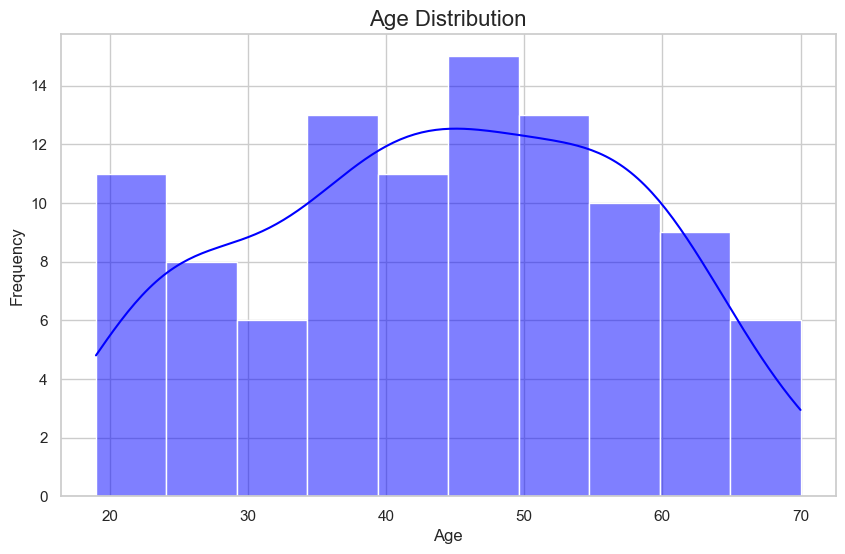

In [1275]:
# Set style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue', bins=10)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



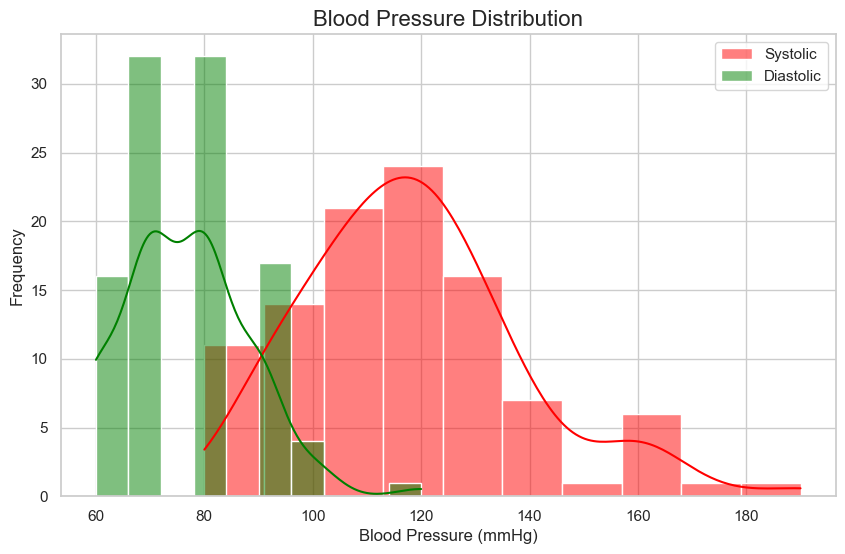

In [1276]:
# 2. Distribution of Systolic and Diastolic Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(df['systolic_BP'], kde=True, color='red', bins=10, label="Systolic")
sns.histplot(df['diastolic_BP'], kde=True, color='green', bins=10, label="Diastolic")
plt.title("Blood Pressure Distribution", fontsize=16)
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.legend()
plt.show()



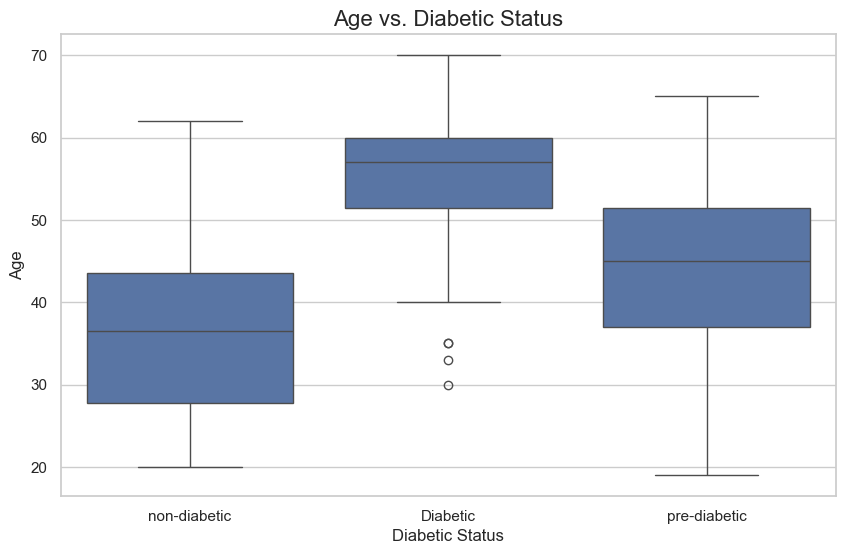

In [1277]:
# 4. Box plot of Age vs. Diabetic status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetic / pre-diabetic / Non-diabetic)', y='age', data=df)
plt.title("Age vs. Diabetic Status", fontsize=16)
plt.xlabel("Diabetic Status")
plt.ylabel("Age")
plt.show()



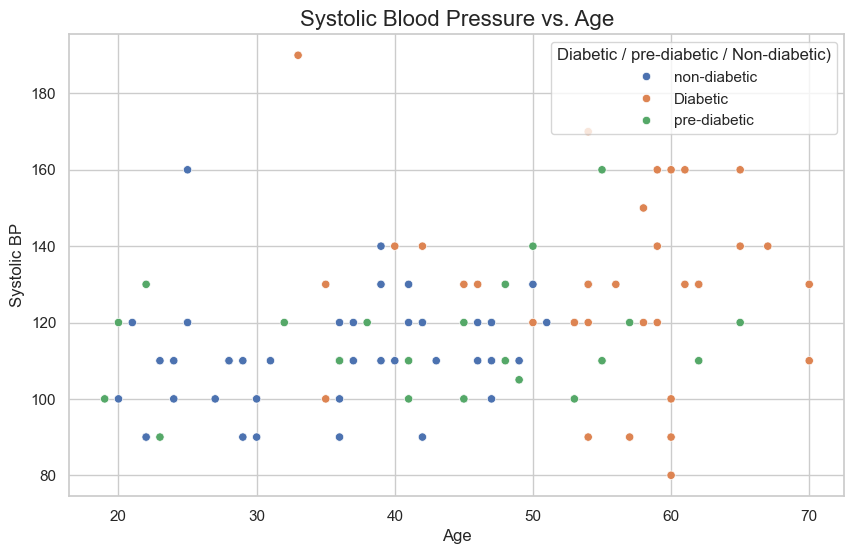

In [1278]:
# 5. Scatter plot between Systolic BP and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='systolic_BP', hue='Diabetic / pre-diabetic / Non-diabetic)', data=df)
plt.title("Systolic Blood Pressure vs. Age", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Systolic BP")
plt.show()

- ## Here the Description of the Data

1. ### code:
This is a unique identifier assigned to each record in the dataset. It likely represents individual participants in the study or survey.

2. ### Diabetic / pre-diabetic / Non-diabetic:
This column indicates the diabetic status of the individuals.
- Diabetic: The person has diabetes.
- Pre-diabetic: The person is at high risk of developing diabetes but has not yet developed it.
- Non-diabetic: The person does not have diabetes.
3. ### gender:
The gender of the individuals (likely either "male" or "female").

4. ### age:
The age of the individuals in years.

5. ### framingham score interpretation:
The Framingham score is a risk score used to estimate the 10-year cardiovascular risk of an individual.
Interpretation: Indicates the calculated risk (e.g., "Low Risk," "Moderate Risk," or "High Risk").

6. ### Valsalva ratio / Cardiac autonomic reflexes tests (CART):
The Valsalva ratio measures the heart's response to a specific breathing exercise. It’s used to assess autonomic nervous system function.
Cardiac Autonomic Reflexes Test (CART): A set of tests evaluating the autonomic regulation of the heart.

7. ### Deep breath: change in HR (bpm) / Cardiac autonomic reflexes tests (CART):
Measures the change in heart rate (HR) during deep breathing, another component of the CART.
This assesses how well the autonomic nervous system controls heart rate.

8. ### Stand test: 30:15 ratio / Cardiac autonomic reflexes tests (CART):
Another component of the CART tests.
Measures heart rate response during the stand test, which involves standing up after lying down.

9. ### BP (Blood Pressure):
This column provides a reading of the individual's blood pressure, typically written as systolic/diastolic.
Systolic BP: The pressure in your arteries when your heart beats.
Diastolic BP: The pressure in your arteries when your heart is resting between beats.

10. ### Blood glucose level:
The concentration of glucose (sugar) in the blood.
Used to determine the individual's blood sugar status, important for diagnosing diabetes.

11. ###  Waist circumference (cm):
Measures the waist circumference of the individual in centimeters.
A larger waist circumference is often linked with higher risks of cardiovascular disease and diabetes.

12. ### hip circumference (cm):
Measures the hip circumference in centimeters.

13. ### BMI (Body Mass Index):
A person's weight in kilograms divided by the square of height in meters (kg/m²).
Used as a measure of body fat, categorizing people as underweight, normal weight, overweight, or obese.

14. ### waist/hip ratio:
The ratio of waist circumference to hip circumference.
A higher waist-to-hip ratio is associated with increased risk for heart disease and type 2 diabetes.

15. ### fat percentage (%) / body composition:
The percentage of body fat, calculated from body composition analysis.
Higher fat percentages could indicate obesity or other health conditions.

16. ### muscle percentage (%) / body composition:
The percentage of the individual’s body weight that comes from muscle.
A higher muscle percentage usually indicates better physical fitness.

17. ### bone mass (kg) / body composition:
The mass of bones in kilograms, derived from a body composition test.
Bone mass is an indicator of bone density and overall skeletal health.

18. ### basal metabolic rate (Kcal) / body composition:
Basal Metabolic Rate (BMR) represents the amount of calories your body needs to perform basic functions at rest.
Higher BMR generally indicates higher muscle mass and greater energy requirements.

19. ### Systolic BP (extracted):
The systolic blood pressure value extracted from the "BP" column.
Represents the pressure in the arteries when the heart beats.

20. ### Diastolic BP (extracted):
The diastolic blood pressure value extracted from the "BP" column.
Represents the pressure in the arteries when the heart is at rest between beats.


In [1279]:
df['framingham score interpertation'].head()

0     low
1    high
2    high
3    high
4     low
Name: framingham score interpertation, dtype: object

In [1280]:
len(df.columns)

36

In [1281]:
df.drop(['code'] , axis=1 ,inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_33652\875189368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='framingham score interpertation', data=df, palette='coolwarm')


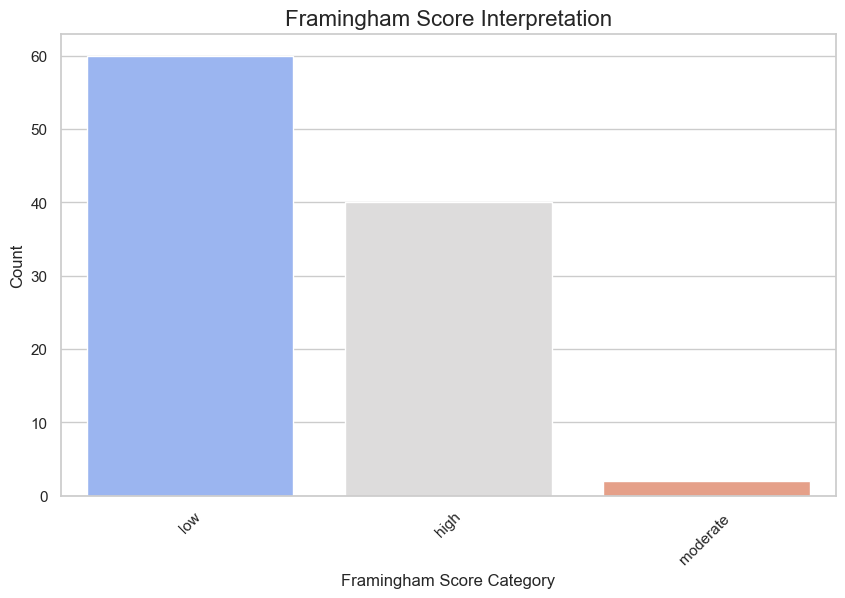

In [1282]:
# Create a bar plot for the "Framingham score interpretation" column
plt.figure(figsize=(10, 6))
sns.countplot(x='framingham score interpertation', data=df, palette='coolwarm')
plt.title("Framingham Score Interpretation", fontsize=16)
plt.xlabel("Framingham Score Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

## Display Data After Preprocessing

In [1283]:
data_cleaned = df.drop(["other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",],axis=1) 

In [1284]:
data_cleaned.head(2)

,Diabetic / pre-diabetic / Non-diabetic),gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,...,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,"SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",systolic_BP,diastolic_BP
0,non-diabetic,male,43.0,low,1.500000,23.333333,1.500000,8.7,26.6,70.7,...,94.0,0.300,0.511,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",no,110.0,70.0
1,non-diabetic,male,46.0,high,1.722222,15.151515,1.111111,11.6,37.2,84.5,...,80.0,0.269,0.533,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,no,120.0,70.0


In [1285]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 33 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   Diabetic / pre-diabetic / Non-diabetic)                                                                                102 non-null    object 
 1   gender                                                                                                                 102 non-null    object 
 2   age                                                                                                                    102 non-null    float64
 3   framingham score interpertation                                                                                        102 non-null    object 
 4   Va

## Clustering

In [1286]:
# Drop the column "Diabetic / pre-diabetic / Non-diabetic"
data_without_diabetes =data_cleaned.drop(['Diabetic / pre-diabetic / Non-diabetic)'],axis=1)

In [1287]:
# Selecting only numerical columns for clustering
numeric_data = data_without_diabetes.select_dtypes(include=[np.number])

In [1288]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [1289]:
# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [1290]:


# Step 1: Apply GMM Clustering
gmm = GaussianMixture(n_components=3, random_state=seed)
gmm_labels = gmm.fit_predict(scaled_data)

In [1291]:
# Add the labels to the DataFrame
data_cleaned['Cluster'] = gmm_labels

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_33652\2383223268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetic / pre-diabetic / Non-diabetic)', data=data_cleaned, palette='coolwarm')


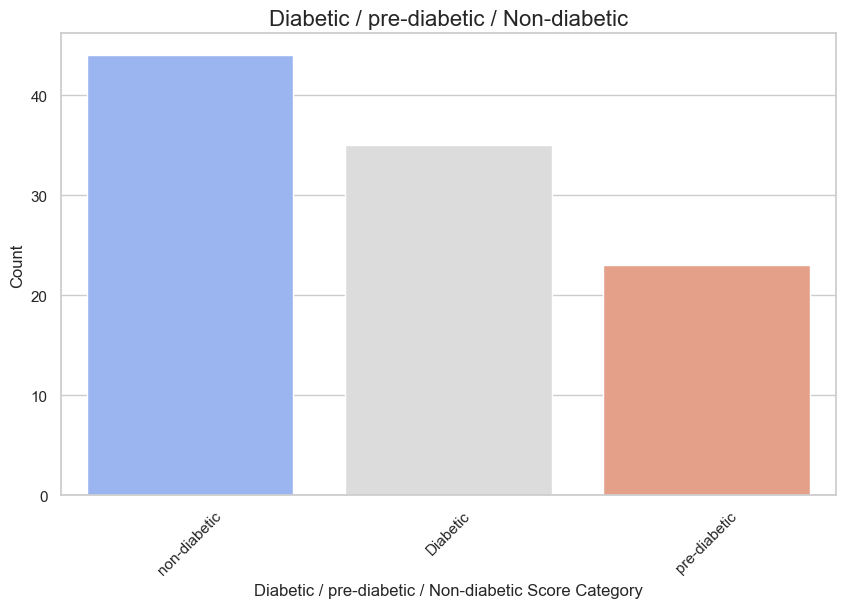

In [1292]:
# Create a bar plot for the "Framingham score interpretation" column
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetic / pre-diabetic / Non-diabetic)', data=data_cleaned, palette='coolwarm')
plt.title("Diabetic / pre-diabetic / Non-diabetic", fontsize=16)
plt.xlabel("Diabetic / pre-diabetic / Non-diabetic Score Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [1293]:
# Step 5: Map clusters to classes based on the most common label in each cluster
def assign_cluster_classes(row):
    if row['Cluster'] == 0:
        return 'Class 1'
    elif row['Cluster'] == 1:
        return 'Class 2'
    else:
        return 'Class 3'

# Create a mapping of cluster labels to class names
data_cleaned['Cluster Class'] = data_cleaned['Cluster'].map({0: 'Diabetic', 1: 'non-diabetic', 2: 'pre-diabetic'})

In [1294]:
# Step 4: Convert diabetic labels to string to ensure consistency
data_cleaned['Diabetic / pre-diabetic / Non-diabetic'] = data_cleaned['Diabetic / pre-diabetic / Non-diabetic)'].astype(str)


In [1295]:
data_cleaned.drop(["Diabetic / pre-diabetic / Non-diabetic)"],axis=1,inplace=True)

In [1296]:
# Step 4: Compare the cluster output with the original diabetic labels
comparison_df = data_cleaned[['Diabetic / pre-diabetic / Non-diabetic', 'Cluster Class']]


In [1297]:
comparison_df.head()

,Diabetic / pre-diabetic / Non-diabetic,Cluster Class
0,non-diabetic,non-diabetic
1,non-diabetic,non-diabetic
2,Diabetic,Diabetic
3,Diabetic,pre-diabetic
4,non-diabetic,non-diabetic


In [1298]:
comparison_df.head()
# Step 5: Generate confusion matrix and classification report
conf_matrix = confusion_matrix(comparison_df['Diabetic / pre-diabetic / Non-diabetic'], comparison_df['Cluster Class'])
class_report = classification_report(comparison_df['Diabetic / pre-diabetic / Non-diabetic'], comparison_df['Cluster Class'])


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_33652\1942919464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetic / pre-diabetic / Non-diabetic', data=comparison_df, palette='coolwarm')


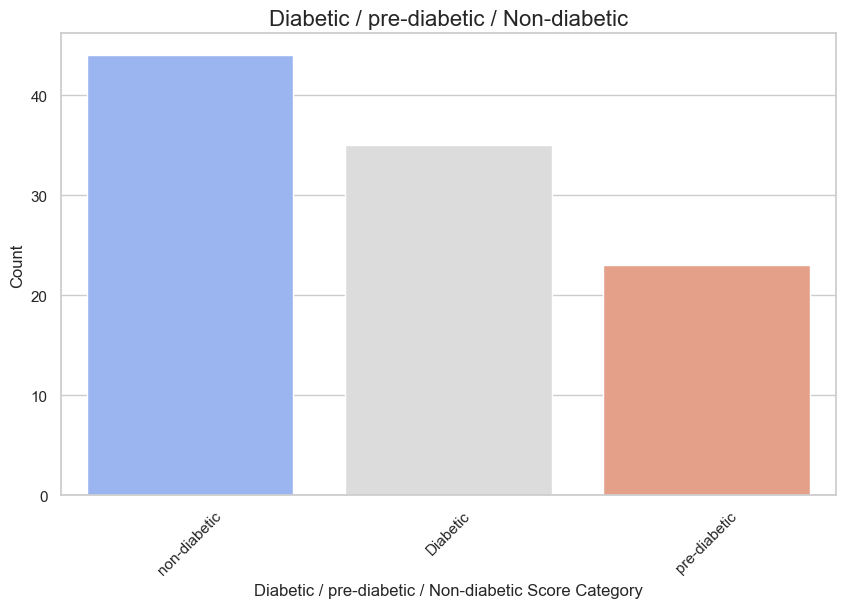

In [1299]:
# Create a bar plot for the "Framingham score interpretation" column
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetic / pre-diabetic / Non-diabetic', data=comparison_df, palette='coolwarm')
plt.title("Diabetic / pre-diabetic / Non-diabetic", fontsize=16)
plt.xlabel("Diabetic / pre-diabetic / Non-diabetic Score Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_33652\2522458519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data_cleaned, palette='coolwarm')


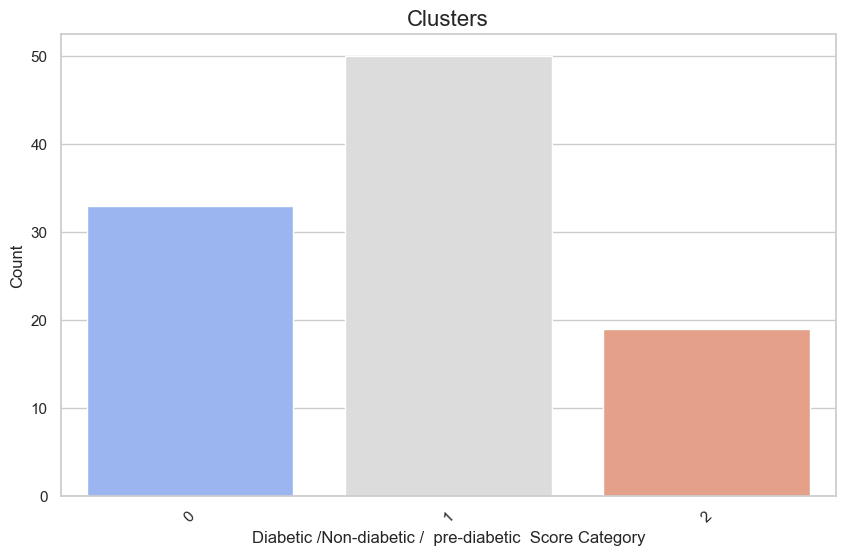

In [1300]:
# Create a bar plot for the "Framingham score interpretation" column
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data_cleaned, palette='coolwarm')
plt.title("Clusters", fontsize=16)
plt.xlabel("Diabetic /Non-diabetic /  pre-diabetic  Score Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

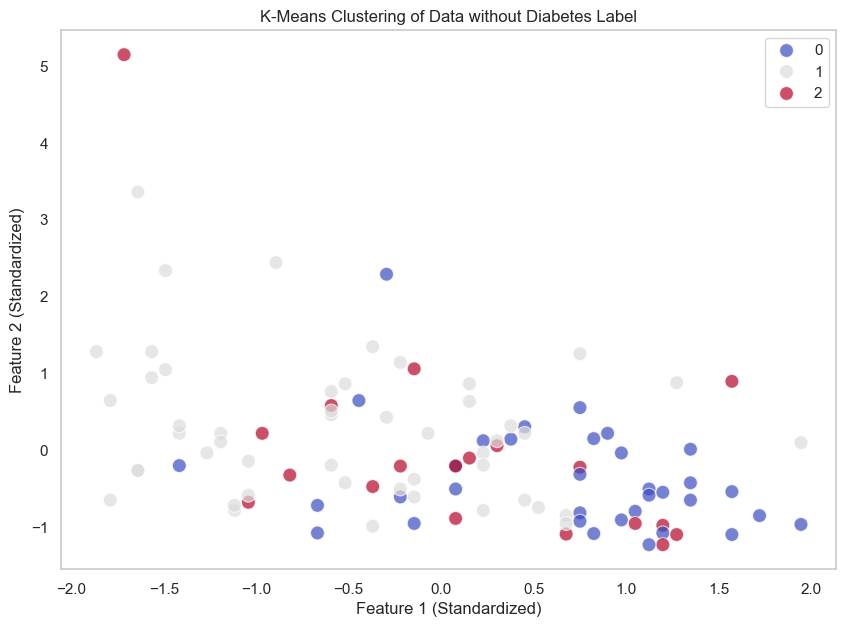

In [1301]:
# Step 6: Visualize the clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='coolwarm', s=100, alpha=0.7)
plt.title('K-Means Clustering of Data without Diabetes Label')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid()
plt.show()

# using PCA to reduce DIM

In [1302]:

# Step 3: PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

In [1303]:
# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels

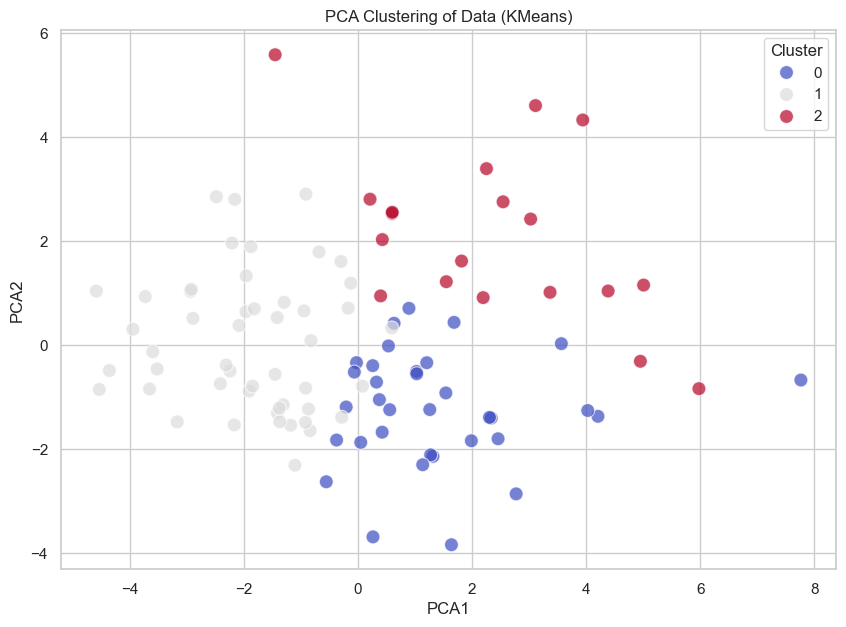

In [1304]:
# Step 4: Visualize the PCA components with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='coolwarm', s=100, alpha=0.7)
plt.title('PCA Clustering of Data (KMeans)')
plt.show()

# Classification

In [1305]:
data_cleaned.head()

,gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,...,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,"SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",systolic_BP,diastolic_BP,Cluster,Cluster Class,Diabetic / pre-diabetic / Non-diabetic
0,male,43.0,low,1.500000,23.333333,1.500000,8.7,26.6,70.7,5.6,...,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",no,110.0,70.0,1,non-diabetic,non-diabetic
1,male,46.0,high,1.722222,15.151515,1.111111,11.6,37.2,84.5,5.5,...,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,no,120.0,70.0,1,non-diabetic,non-diabetic
2,female,56.0,high,1.500000,15.151515,1.187500,11.6,34.4,79.1,7.4,...,0.410,0.7,1382.0,"recent NSTEMI, DM since 10 years, ACS since 2 ...",empagliflozin 10 mg,130.0,80.0,0,Diabetic,Diabetic
3,male,54.0,high,1.347826,12.500000,1.434783,12.2,40.3,84.5,5.7,...,0.579,2.9,1747.0,"HFrEF, DM since 3 years, HTN, Hx OF ACS, Hx OF...",empagliflozin 10 mg,90.0,60.0,2,pre-diabetic,Diabetic
4,male,36.0,low,1.583333,23.809524,1.250000,9.5,28.6,85.1,5.1,...,0.463,3.3,1545.0,"infective endocarditis, IV drug addict, cannab...",no,110.0,80.0,1,non-diabetic,non-diabetic


In [1306]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 35 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   gender                                                                                                                 102 non-null    object 
 1   age                                                                                                                    102 non-null    float64
 2   framingham score interpertation                                                                                        102 non-null    object 
 3   Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                                                                102 non-null    float64
 4   De

In [1307]:
lab_columns = [col for col in data_cleaned.columns if col.endswith('/lab')]

In [1308]:
lab_data = data_cleaned[lab_columns]

## One - Hot Encoding 

In [1309]:
# Perform one-hot encoding for object columns
object_columns = data_cleaned.select_dtypes(include='object').columns



In [1310]:
object_df = data_cleaned[object_columns]

In [1311]:
toOHC_df =object_df[["gender","Diabetic / pre-diabetic / Non-diabetic"]]

In [1312]:

# One-hot encode the object columns
df_encoded = pd.get_dummies(toOHC_df, columns=toOHC_df.columns,drop_first=True)

`splite data to labs/ body_composition / cart / objects / target`

In [1313]:
body_composition_columns = [col for col in data_cleaned.columns if col.endswith('body composition')]
cart_columns = [col for col in data_cleaned.columns if col.endswith('Cardiac autonomic reflexes tests (CART)')]

In [1314]:
body_composition_data = data_cleaned[body_composition_columns]
cart_data = data_cleaned[cart_columns]

In [1315]:
target = data_cleaned["framingham score interpertation"]


In [1316]:
lab_data.head()

,"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,HOMA-IR (<1.8) /lab,T. cholesterol (<200) /lab,TG (<200) /lab,HDL >35) /lab,LDL (<140) /lab,K (3.5-5.1) /lab,TSH (0.27-4.2) /lab
0,8.7,26.6,70.7,5.6,89.0,0.4,135.0,157.0,32.0,72,4.1,2.10
1,11.6,37.2,84.5,5.5,91.0,0.9,241.0,124.0,29.0,187,4.2,3.40
2,11.6,34.4,79.1,7.4,321.0,7.4,269.6,247.0,31.0,99,4.5,3.72
3,12.2,40.3,84.5,5.7,86.0,0.9,132.0,204.0,31.0,60,3.9,30.70
4,9.5,28.6,85.1,5.1,100.0,2.6,141.0,67.0,42.0,86,4.1,4.12


In [1317]:
cart_data.head()

,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)
0,1.500000,23.333333,1.500000
1,1.722222,15.151515,1.111111
2,1.500000,15.151515,1.187500
3,1.347826,12.500000,1.434783
4,1.583333,23.809524,1.250000


In [1318]:
body_composition_data.head()

,weight (kg) /body composition,Height (cm) /body composition,BMI /body composition,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition
0,84.8,177.0,27.1,94.0,0.300,0.511,0.554,3.7,1822.0
1,68.3,175.0,22.3,80.0,0.269,0.533,0.473,2.8,1565.0
2,72.8,156.0,29.9,100.0,0.436,0.411,0.410,0.7,1382.0
3,86.1,171.0,29.4,110.0,0.295,0.515,0.579,2.9,1747.0
4,61.1,175.0,20.0,77.0,0.189,0.592,0.463,3.3,1545.0


In [1319]:
df_encoded.head()

,gender_male,Diabetic / pre-diabetic / Non-diabetic_non-diabetic,Diabetic / pre-diabetic / Non-diabetic_pre-diabetic
0,True,True,False
1,True,True,False
2,False,False,False
3,True,False,False
4,True,True,False


In [1320]:
target.head()

0     low
1    high
2    high
3    high
4     low
Name: framingham score interpertation, dtype: object

## Trainning

### Here an Expert Note:
<hr>
We are interested on looking at the effect of 

- BMI
- Waist circumference
- Percentage Body fat

Parameters that are used to build the Framingham risk score include:
- Gender
- Age
- HbA1c
- Sys BP
- T. Chol
- HDL
<hr>

### First list check the Expert Note
by selecting the columes that the Expert maintion and train the model with them only then try to add the features that we want to see there effect

In [1321]:
Base_line_data = df[['age','HBA1C (<5.7) /lab','systolic_BP','T. cholesterol (<200) /lab','HDL >35) /lab']]

In [1322]:
Base_line_data.head()

,age,HBA1C (<5.7) /lab,systolic_BP,T. cholesterol (<200) /lab,HDL >35) /lab
0,43.0,5.6,110.0,135.0,32.0
1,46.0,5.5,120.0,241.0,29.0
2,56.0,7.4,130.0,269.6,31.0
3,54.0,5.7,90.0,132.0,31.0
4,36.0,5.1,110.0,141.0,42.0


In [1323]:
Base_line_X = pd.concat([df_encoded['gender_male'], Base_line_data], axis=1)

In [1324]:
Base_line_X.head()

,gender_male,age,HBA1C (<5.7) /lab,systolic_BP,T. cholesterol (<200) /lab,HDL >35) /lab
0,True,43.0,5.6,110.0,135.0,32.0
1,True,46.0,5.5,120.0,241.0,29.0
2,False,56.0,7.4,130.0,269.6,31.0
3,True,54.0,5.7,90.0,132.0,31.0
4,True,36.0,5.1,110.0,141.0,42.0


In [1325]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Base_line_X, target, test_size=0.2, random_state=42)

# Define models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_accuracy = 0
best_model_name = ""

# Dictionary to store accuracy values for plotting
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store accuracy for each model
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy and accuracy < 1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model to a file
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Best model saved: {best_model_name} with accuracy: {best_accuracy:.2f}")


SVM Accuracy: 0.67
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
Best model saved: Decision Tree with accuracy: 0.86


In [1326]:
# Calculate the average accuracy
Base_line_average_accuracy = (model_accuracies['SVM'] + model_accuracies['Decision Tree']  + model_accuracies['Random Forest'] ) / 3

# Print the result
print(f"Average accuracy:{Base_line_average_accuracy:.2f}")

Average accuracy:0.79


### Trying to test the effect of the following features

In [1327]:
feature_to_test = df[['BMI /body composition','waiste circumference (cm) /body composition','body fat (%) /body composition']]

In [1328]:
best_model = None
best_accuracy = 0
best_model_name = ""
accuracy_list= {}
ci_list = []
for i in range(len(feature_to_test.columns)):
    
    X = pd.concat([Base_line_X,feature_to_test.iloc[:,i]], axis=1)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed)
    # Define models
    models = {
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        
    }
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        # ci_list.append(bootstrap_predict(model, X_test, y_test, n_iterations=1000))
        accuracy_list[str(f"{lab_data.iloc[:,i].name} - {name} ")] = accuracy
        print(f"{name} Accuracy: {accuracy:.2f}")
        # Save the best model
        if accuracy > best_accuracy and accuracy !=1:
            best_accuracy = accuracy
            best_model = model
            best_model_name = name

SVM Accuracy: 0.62
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
SVM Accuracy: 0.67
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
SVM Accuracy: 0.62
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86


In [1329]:

svm_accuracies =  plot_sorted_accuracies(accuracy_list,  ["SVM"] , plot=False)
Decision_Tree_accuracies =  plot_sorted_accuracies(accuracy_list,  ["Decision Tree"] , plot=False)
Random_Forest_accuracies =  plot_sorted_accuracies(accuracy_list,  ["Random Forest"] , plot=False)

In [1330]:
avg_accuracy = []
avg_accuracy = average_accuracy(svm_accuracies, Decision_Tree_accuracies, Random_Forest_accuracies)
sorted_averages = sorted(avg_accuracy, key=lambda x: x[1], reverse=True)

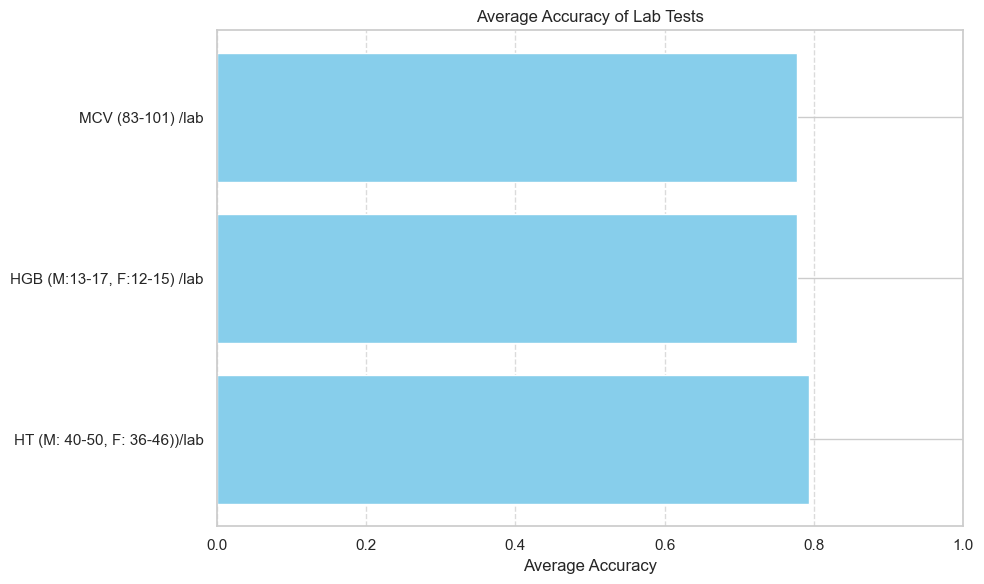

In [1331]:
# Unzip the data into two lists: tests and accuracies
tests, accuracies = zip(*sorted_averages)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(tests, accuracies, color='skyblue')
plt.xlabel('Average Accuracy')
plt.title('Average Accuracy of Lab Tests')
plt.xlim(0, 1)  # Set x-axis limits to 0-1 for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

# Feature Importance

In [1332]:
# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

print(importance_df.sort_values(by='Importance', ascending=False))

                          Feature  Importance
2               HBA1C (<5.7) /lab    0.702117
5                   HDL >35) /lab    0.170632
4      T. cholesterol (<200) /lab    0.079088
1                             age    0.048163
0                     gender_male    0.000000
3                     systolic_BP    0.000000
6  body fat (%) /body composition    0.000000


# Confidence Intervals:
Use bootstrapping to estimate confidence intervals for predictions

In [1333]:
# print(ci_list)

## Now let's use the whole data

### let's see which lab feature effect the model overall

#### use all of them see the base line accuracy

In [1334]:
Lab_X = pd.concat([df_encoded, lab_data], axis=1)


In [1335]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Lab_X, target, test_size=0.2, random_state=seed)

# Define models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_accuracy = 0
best_model_name = ""

# Dictionary to store accuracy values for plotting
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store accuracy for each model
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy and accuracy != 1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model to a file
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Best model saved: {best_model_name} with accuracy: {best_accuracy:.2f}")


SVM Accuracy: 0.62
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
Best model saved: Decision Tree with accuracy: 0.86


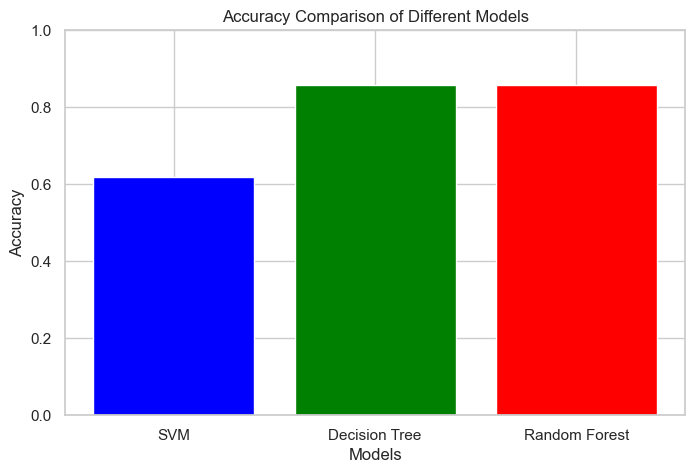

In [1336]:

# Plot the model accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

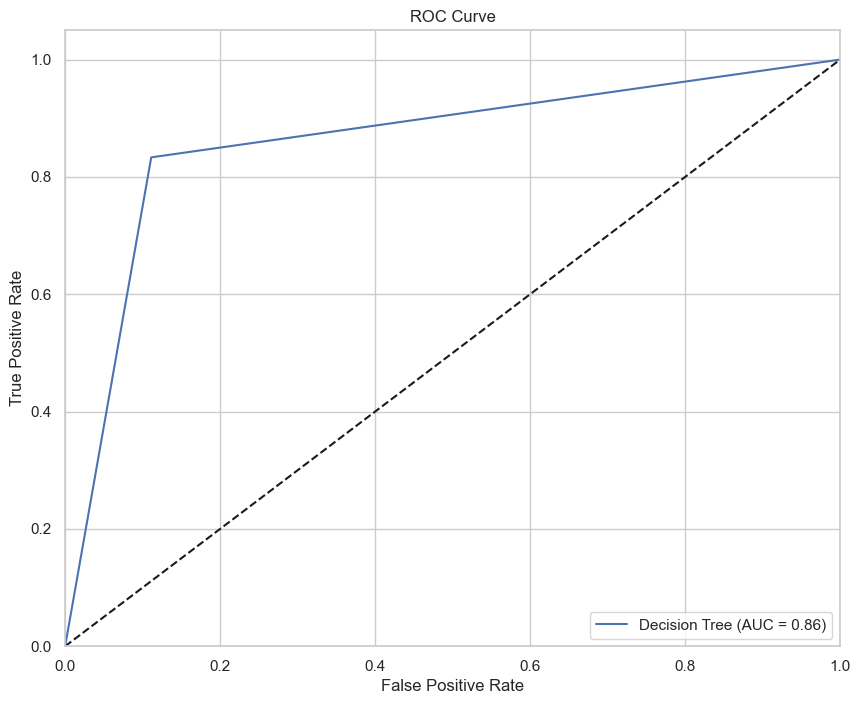

In [1337]:
# Draw the ROC curve for the final model
# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()  # Binarize the test labels

# Predict probabilities for ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Now let's test all data Features

In [1338]:
before_lab_x = pd.concat([df_encoded,cart_data, body_composition_data], axis=1)

In [1339]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(before_lab_x, target, test_size=0.2, random_state=42)

# Define models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_accuracy = 0
best_model_name = ""

# Dictionary to store accuracy values for plotting
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store accuracy for each model
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy and accuracy < 1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model to a file
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Best model saved: {best_model_name} with accuracy: {best_accuracy:.2f}")


SVM Accuracy: 0.76
Decision Tree Accuracy: 0.81
Random Forest Accuracy: 0.95
Best model saved: Random Forest with accuracy: 0.95


In [1340]:
# Calculate the average accuracy
Base_line_average_accuracy = (model_accuracies['SVM'] + model_accuracies['Decision Tree']  + model_accuracies['Random Forest'] ) / 3

# Print the result
print(f"Average accuracy:{Base_line_average_accuracy:.2f}")

Average accuracy:0.84


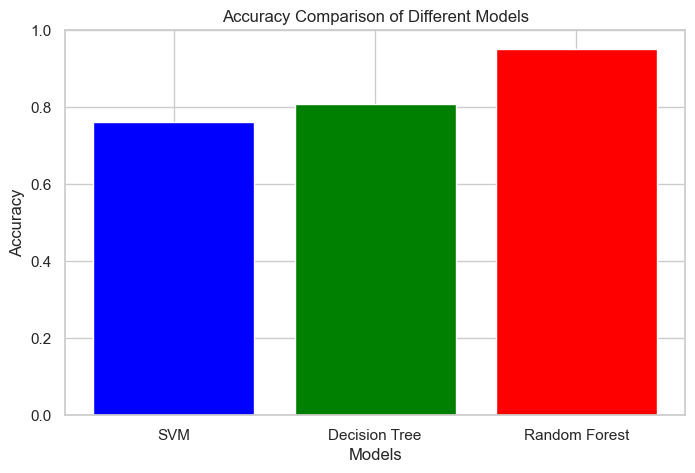

In [1341]:

# Plot the model accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

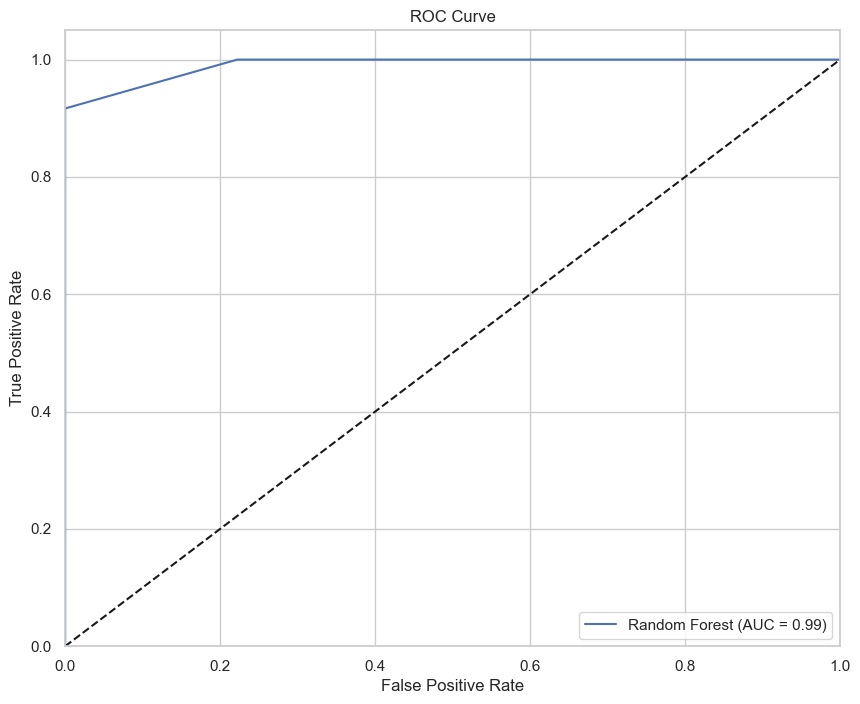

In [1342]:
# Draw the ROC curve for the final model
# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()  # Binarize the test labels

# Predict probabilities for ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Now let's add the labs data one at a time and see the effect on the accuracy

In [1343]:
best_model = None
best_accuracy = 0
best_model_name = ""
accuracy_list= {}
importance_list= [ ]

for i in range(len(lab_data.columns)):
    
    X = pd.concat([df_encoded, body_composition_data,lab_data.iloc[:,i]], axis=1)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed)
    # Define models
    models = {
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        
    }
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list[str(f"{lab_data.iloc[:,i].name} - {name} ")] = accuracy
        print(f"{name} Accuracy: {accuracy:.2f}")
        # Save the best model
        if accuracy > best_accuracy and accuracy !=1:
            best_accuracy = accuracy
            best_model = model
            # Extract feature importances
            if name != 'SVM':
                feature_importances = best_model.feature_importances_

                # Create a DataFrame to display feature importance
                feature_names = X.columns
                importance_list.append({'Feature': feature_names, 'Importance': feature_importances})

            # print(importance_df.sort_values(by='Importance', ascending=False))
            best_model_name = name

    

SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.90
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.90
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 1.00
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.90
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.90
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 1.00
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
SVM Accuracy: 0.76
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 0.90


In [1344]:

# Extracting unique lab tests and organizing the values by model
lab_tests = sorted(set(k.split('/')[0] for k in accuracy_list.keys()))
lab_tests

['F. BGL (70-109) ',
 'HBA1C (<5.7) ',
 'HDL >35) ',
 'HGB (M:13-17, F:12-15) ',
 'HOMA-IR (<1.8) ',
 'HT (M: 40-50, F: 36-46))',
 'K (3.5-5.1) ',
 'LDL (<140) ',
 'MCV (83-101) ',
 'T. cholesterol (<200) ',
 'TG (<200) ',
 'TSH (0.27-4.2) ']

In [1345]:
# Group values by model
svm_values = [v for k, v in accuracy_list.items() if 'SVM' in k]
dt_values = [v for k, v in accuracy_list.items() if 'Decision Tree' in k]
rf_values = [v for k, v in accuracy_list.items() if 'Random Forest' in k]



In [1346]:
# Bar width and positions
bar_width = 0.2
index = np.arange(len(lab_tests))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

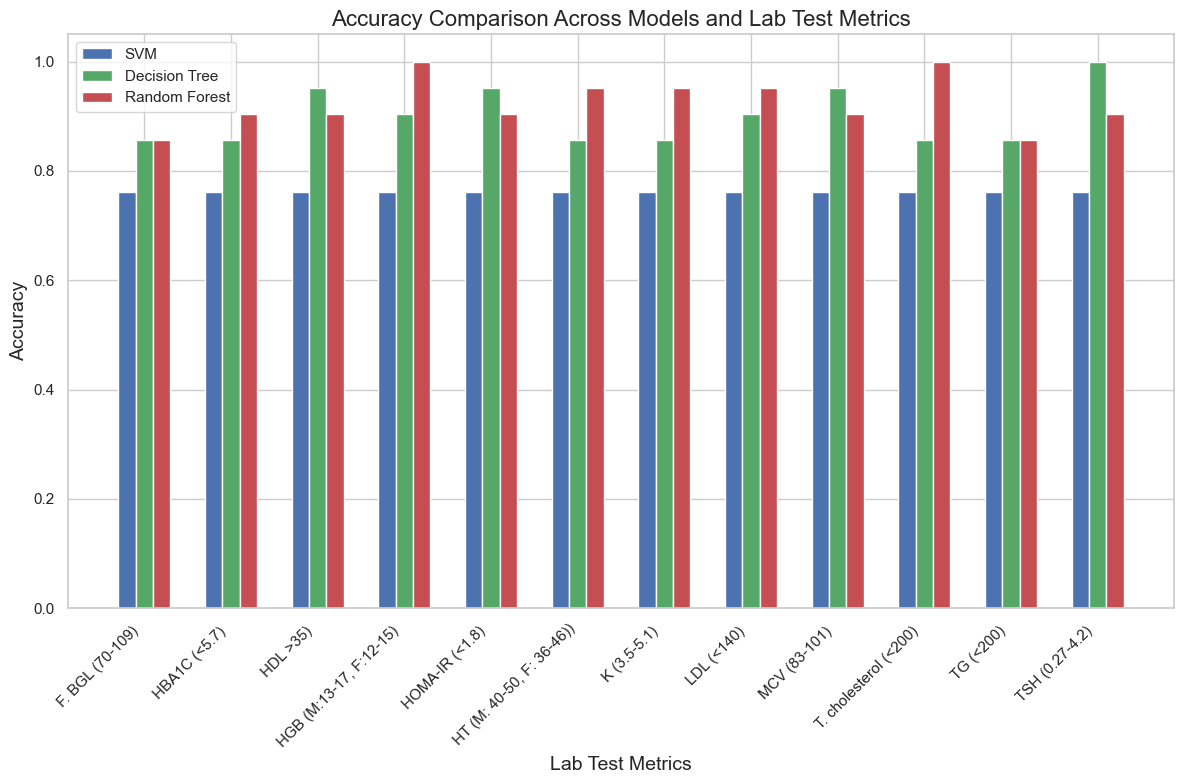

In [1347]:


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each model
ax.bar(index, svm_values, bar_width, label='SVM', color='b')
ax.bar(index + bar_width, dt_values, bar_width, label='Decision Tree', color='g')
ax.bar(index + 2 * bar_width, rf_values, bar_width, label='Random Forest', color='r')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Lab Test Metrics', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracy Comparison Across Models and Lab Test Metrics', fontsize=16)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(lab_tests, rotation=45, ha="right")

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [1348]:
svm_accuracies =  plot_sorted_accuracies(accuracy_list,  ["SVM"] , plot=False)
Random_Forest_accuracies = plot_sorted_accuracies(accuracy_list,  ["Random Forest"],plot=False)
Decision_Tree_accuracies = plot_sorted_accuracies(accuracy_list,  ["Decision Tree"],plot=False)


In [1349]:
avg_accuracy =average_accuracy(Random_Forest_accuracies, Decision_Tree_accuracies, svm_accuracies)
sorted_averages = sorted(avg_accuracy, key=lambda x: x[1], reverse=True)

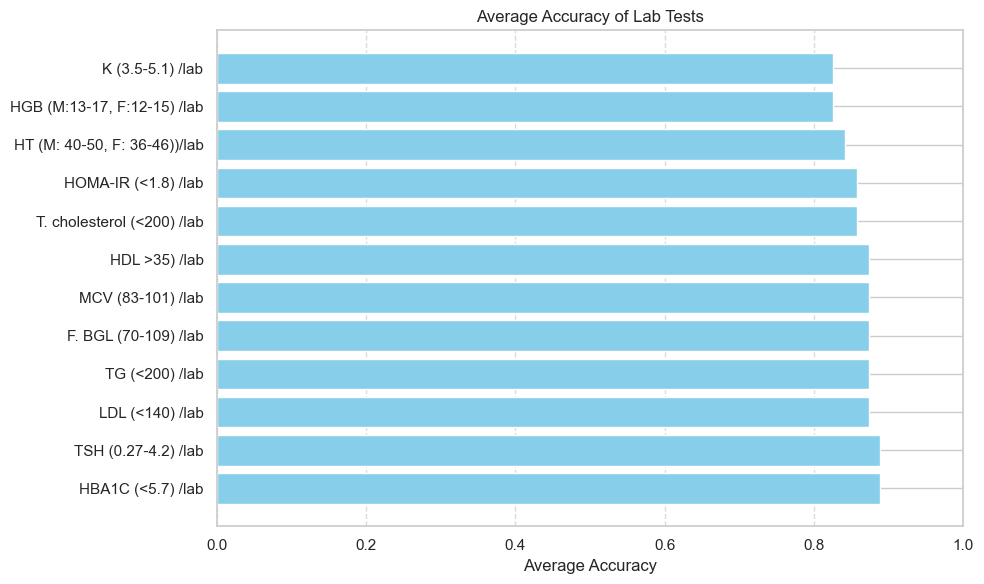

In [1350]:
# Unzip the data into two lists: tests and accuracies
tests, accuracies = zip(*sorted_averages)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(tests, accuracies, color='skyblue')
plt.xlabel('Average Accuracy')
plt.title('Average Accuracy of Lab Tests')
plt.xlim(0, 1)  # Set x-axis limits to 0-1 for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [1351]:
last_features = []

for entry in importance_list:
    last_feature = entry['Feature'][-1]  # Get the last feature
    last_importance = entry['Importance'][-1]  # Get the corresponding importance
    last_features.append({'Feature': last_feature, 'Importance': last_importance})

# Create a DataFrame from the list
df_last_features = pd.DataFrame(last_features)

# Display the DataFrame
print(df_last_features)

                        Feature  Importance
0   HGB (M:13-17, F:12-15) /lab    0.055361
1  HT (M: 40-50, F: 36-46))/lab    0.059727
2             MCV (83-101) /lab    0.055361


## Select the feature the improve the Baseline accuracy

In [1352]:
# Filter lab tests with scores greater than 0.87
filtered_tests = [test for test in sorted_averages if test[1] > Base_line_average_accuracy]
improve_acc_names= []
# Print the filtered lab tests
for test in filtered_tests:
    improve_acc_names.append(test[0])

In [1353]:
data_to_add = lab_data[improve_acc_names]

In [1354]:
X = pd.concat([df_encoded,cart_data, body_composition_data,data_to_add], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed)
# Define models
final_acc= {}
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    
}
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    final_acc[name] = accuracy
    if name !="SVM":
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    print(f"{name} Accuracy: {accuracy:.2f}")
    # Save the best model
    if accuracy > best_accuracy and accuracy !=1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86


In [1355]:
# Calculate the average accuracy
Final_average_accuracy = (final_acc['SVM'] + final_acc['Decision Tree']  + final_acc['Random Forest'] ) / 3

# Print the result
print(f"Average accuracy:{Final_average_accuracy:.2f}")

Average accuracy:0.83


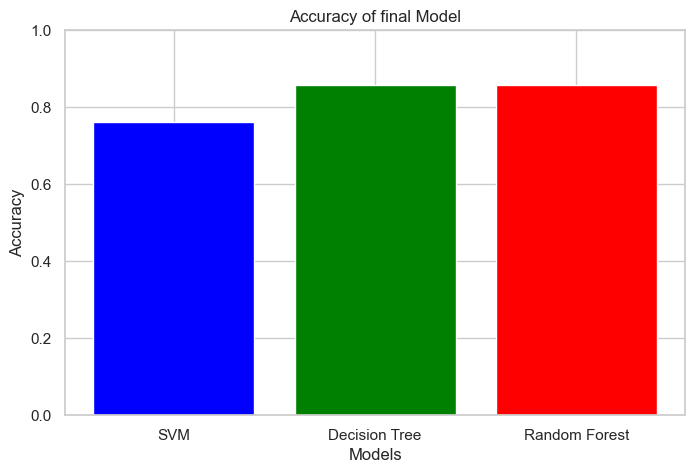

In [1356]:
# Plot the model accuracies
model_names = list(final_acc.keys())
accuracies = list(final_acc.values())

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of final Model')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

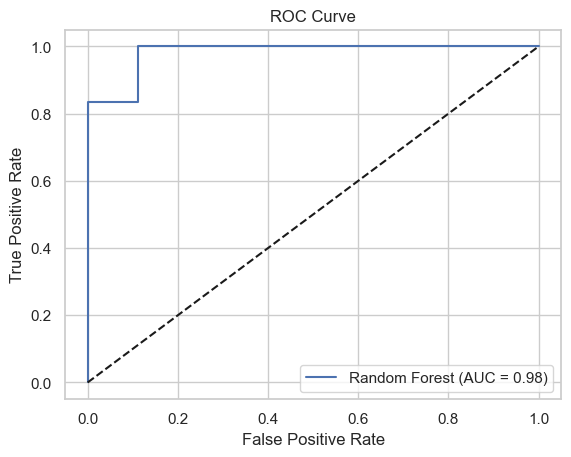

In [1357]:
#  Binarize the test labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Now let's do the same process on CART features

In [1358]:
before_cart_X = pd.concat([df_encoded,body_composition_data,lab_data], axis=1)

In [1359]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(before_cart_X, target, test_size=0.2, random_state=42)

# Define models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_accuracy = 0
best_model_name = ""

# Dictionary to store accuracy values for plotting
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store accuracy for each model
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy and accuracy < 1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model to a file
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Best model saved: {best_model_name} with accuracy: {best_accuracy:.2f}")


SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.81
Best model saved: Decision Tree with accuracy: 0.86


In [1360]:
# Calculate the average accuracy
Base_line_average_accuracy = (model_accuracies['SVM'] + model_accuracies['Decision Tree']  + model_accuracies['Random Forest'] ) / 3

# Print the result
print(f"Average accuracy:{Base_line_average_accuracy:.2f}")

Average accuracy:0.81


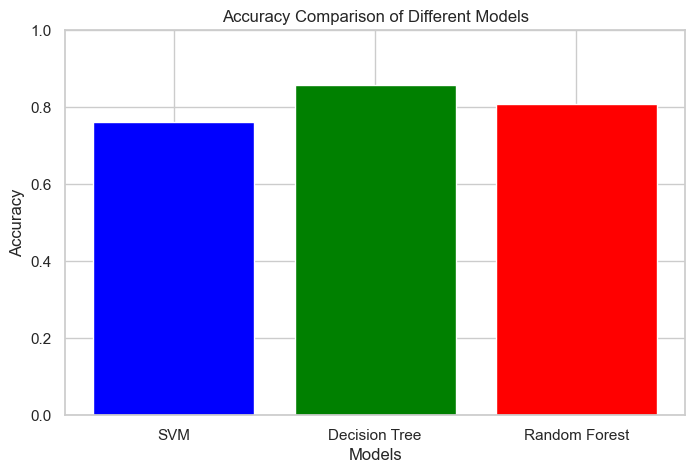

In [1361]:

# Plot the model accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

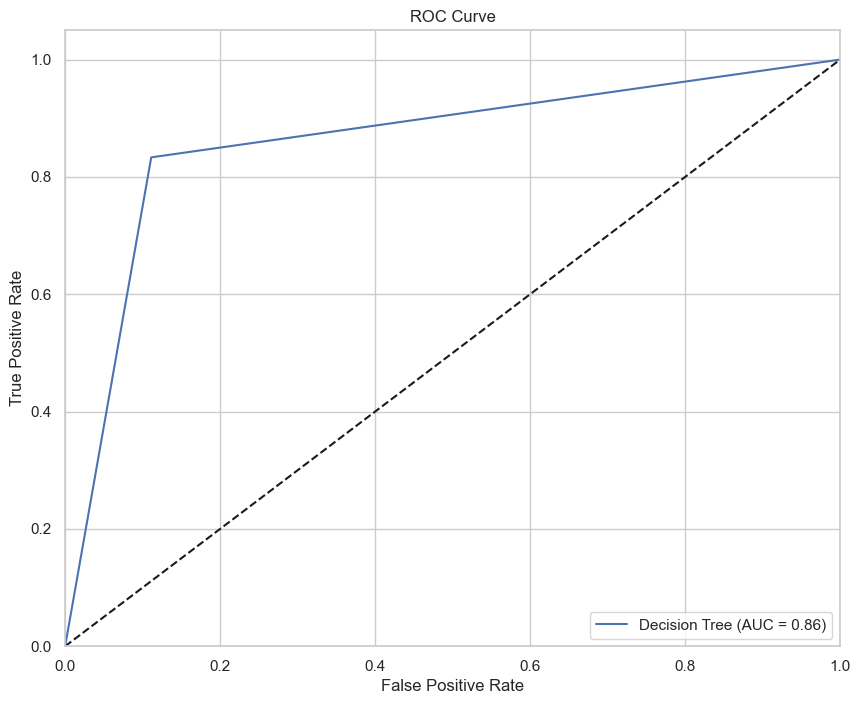

In [1362]:
# Draw the ROC curve for the final model
# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()  # Binarize the test labels

# Predict probabilities for ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### right now i will add the CART features one by one and see what will happen in accuracy

In [1363]:
best_model = None
best_accuracy = 0
best_model_name = ""
accuracy_list= {}
importance_list= []

for i in range(len(cart_data.columns)):
    
    X = pd.concat([df_encoded, body_composition_data,lab_data,cart_data.iloc[:,i]], axis=1)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed)
    # Define models
    models = {
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        
    }
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list[str(f"{cart_data.iloc[:,i].name} - {name} ")] = accuracy
        print(f"{name} Accuracy: {accuracy:.2f}")
        # Save the best model
        if accuracy > best_accuracy and accuracy !=1:
            best_accuracy = accuracy
            if name != 'SVM':
                # Check if the best model has 'feature_importances_' attribute
                if hasattr(best_model, 'feature_importances_'):
                    feature_importances = best_model.feature_importances_
                    # Create a DataFrame to display feature importance
                    feature_names = X.columns
                    importance_list.append({'Feature': feature_names, 'Importance': feature_importances})
                    # Display feature importances or process as needed
                else:
                    print(f"The model {name} does not support feature importances.")
            best_model = model
            best_model_name = name

    

SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
The model Decision Tree does not support feature importances.
Random Forest Accuracy: 0.86
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.90


In [1364]:
# Group values by model
svm_values = [v for k, v in accuracy_list.items() if 'SVM' in k]
dt_values = [v for k, v in accuracy_list.items() if 'Decision Tree' in k]
rf_values = [v for k, v in accuracy_list.items() if 'Random Forest' in k]



In [1365]:
# Bar width and positions
bar_width = 0.25
index = np.arange(len(cart_columns))


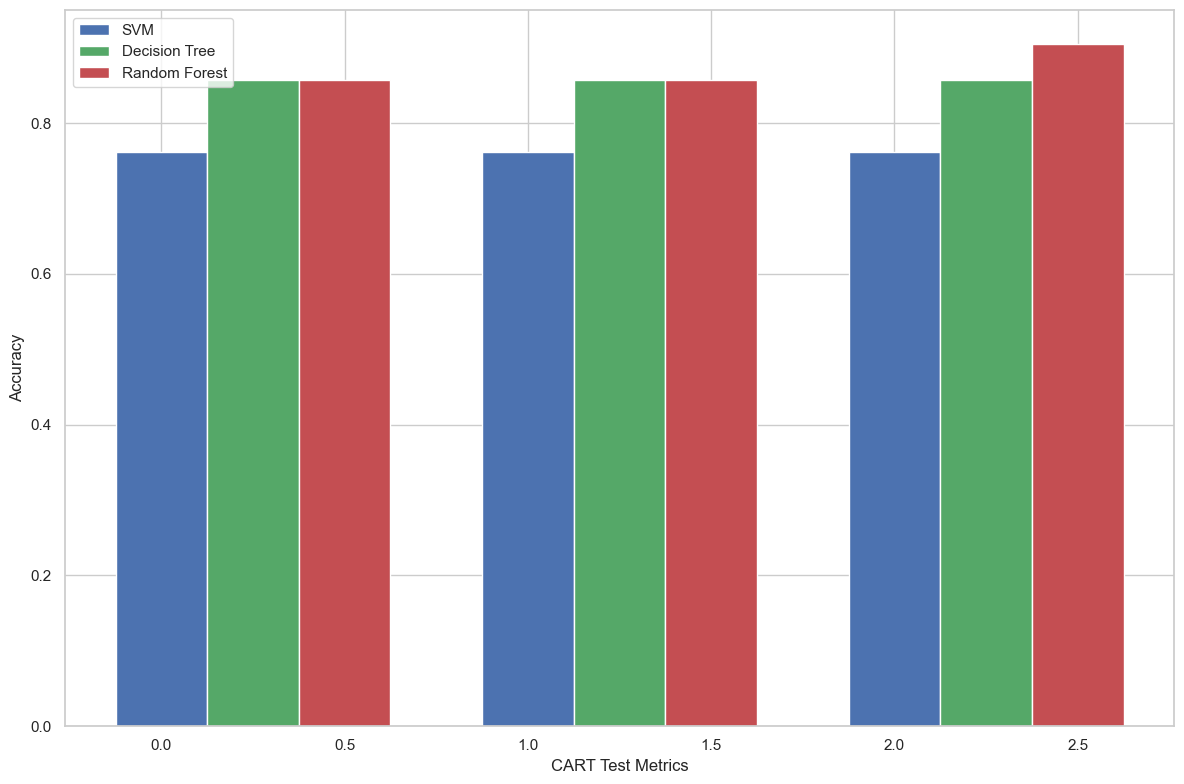

In [1366]:


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each model
ax.bar(index, svm_values, bar_width, label='SVM', color='b')
ax.bar(index + bar_width, dt_values, bar_width, label='Decision Tree', color='g')
ax.bar(index + 2 * bar_width, rf_values, bar_width, label='Random Forest', color='r')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('CART Test Metrics')
ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy Comparison Across Models and Lab Test Metrics', fontsize=16)
# ax.set_xticks(index + bar_width)
# ax.set_xticklabels(cart_columns, rotation=45, ha="right")

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [1367]:

svm_accuracies =  plot_sorted_accuracies(accuracy_list,  ["SVM"] , plot=False)
Decision_Tree_accuracies =  plot_sorted_accuracies(accuracy_list,  ["Decision Tree"] , plot=False)
Random_Forest_accuracies =  plot_sorted_accuracies(accuracy_list,  ["Random Forest"] , plot=False)

In [1368]:
avg_accuracy =average_accuracy(Random_Forest_accuracies, Decision_Tree_accuracies, svm_accuracies)
sorted_averages = sorted(avg_accuracy, key=lambda x: x[1], reverse=True)

In [1369]:
# Filter lab tests with scores greater than 0.87
filtered_tests = [test for test in sorted_averages if test[1] > Base_line_average_accuracy]
improve_acc_names= []
# Print the filtered lab tests
for test in filtered_tests:
    improve_acc_names.append(test[0])

In [1370]:
improve_acc_names

['stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)',
 'Valsalva ratio/ Cardiac autonomic reflexes tests (CART)',
 'Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)']

In [1371]:
last_features = []

for entry in importance_list:
    last_feature = entry['Feature'][-1]  # Get the last feature
    last_importance = entry['Importance'][-1]  # Get the corresponding importance
    last_features.append({'Feature': last_feature, 'Importance': last_importance})

# Create a DataFrame from the list
df_last_features = pd.DataFrame(last_features)

# Display the DataFrame
print(df_last_features)

                                             Feature  Importance
0  stand test: 30:15 ratio /Cardiac autonomic ref...     0.08729


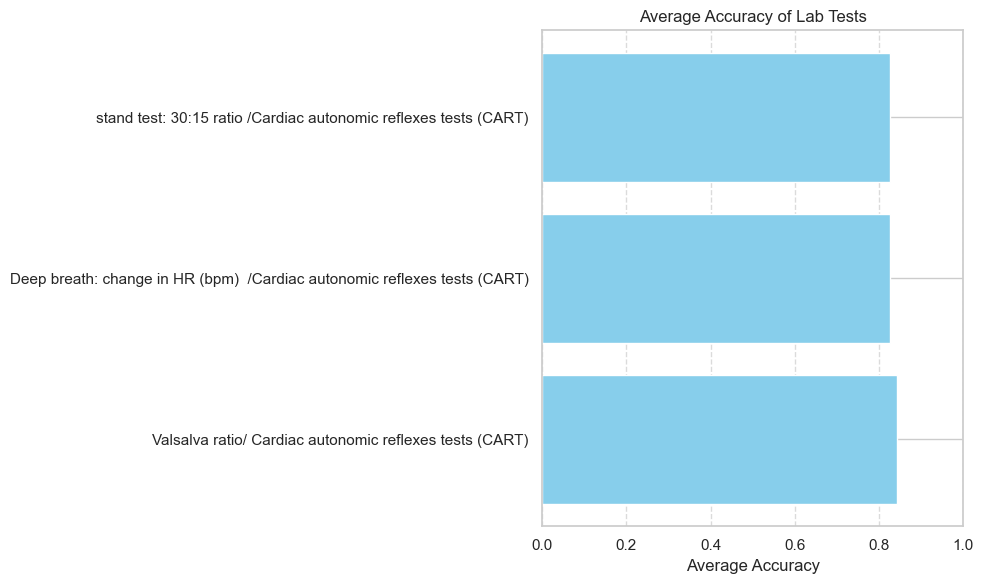

In [1372]:
# Unzip the data into two lists: tests and accuracies
tests, accuracies = zip(*sorted_averages)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(cart_columns, accuracies, color='skyblue')
plt.xlabel('Average Accuracy')
plt.title('Average Accuracy of Lab Tests')
plt.xlim(0, 1)  # Set x-axis limits to 0-1 for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()